# S07 T01: Tasca Tasca del test d'hipòtesis

In [2]:
import math

import numpy as np
from numpy import random
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

### Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

El dataset escollit és sobre els Jocs Olímpics de Tokyo 2020. S'hi pot veure el detall de totes les competicions que van tenir lloc, juntament amb l'edat, nacionalitat, classificació i medalles de cada atleta

Columnes: 
- Unnamed: 0 : # de fila
- Code: codi únic de cada atleta
- Name: nom de l'atleta (COGNOM Nom)
- Gender: Male o Female
- Age: edat dels atletes
- NOC: Comité Olímpic Nacional (206 en total)
- Country: país (206 en total)
- Discipline: cada codi indica una disciplina específica (46 en total)
- Sport: esport equivalent al codi de la columna anterior (46 en total)
- Event: tipus de competició (per equips, individual, masculina, femenina, etc.)
- Rank: classificacio de cada 'Event', sent 1 la 1a posició.
- Medal: medalla (Gold, Silver, Bronze o NaN)

In [156]:
# Carreguem el dataset i eliminem columnes que no volem:

olympics = pd.read_csv('/Users/deliagonzalezmata/Downloads/2020_Olympics_Dataset.csv', encoding = 'latin-1')

olympics = olympics.drop('Unnamed: 0', 1)
olympics = olympics.drop('Code', 1) # la columna Name conté els mateixos unics valors que Code
olympics = olympics.drop('NOC', 1) #la columna Country conté la mateixa informació de forma més clara
olympics = olympics.drop('Discipline', 1) #la columna Sport conté la mateixa informació de forma més clara

olympics.sample(5)

/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_988/3270594272.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  olympics = olympics.drop('Unnamed: 0', 1)
/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_988/3270594272.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  olympics = olympics.drop('Code', 1) # la columna Name conté els mateixos unics valors que Code
/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_988/3270594272.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  olympics = olympics.drop('NOC', 1) #la columna Country conté la mateixa informació de forma més clara
/var/folders/f1/1k69t1011n32zcq6vt7pt73c0000gn/T/ipykernel_988/3270594272.py:8: FutureWarning: In a future version of pand

,Name,Gender,Age,Country,Sport,Event,Rank,Medal
10586,POLIDORI Erika,Female,29,Canada,Baseball/Softball,Softball Team,3.0,Bronze
12213,SIDLAUSKAS Andrius,Male,24,Lithuania,Swimming,Men's 200m Breaststroke,NaN,NaN
4773,GUAN Chenchen,Female,16,China,Artistic Gymnastics,Women's Balance Beam,1.0,Gold
4281,GASPAROTTO Marta,Female,24,Italy,Baseball/Softball,Softball Team,6.0,NaN
5478,HOSSEINI Mirhashem,Male,22,Iran,Taekwondo,Men -68kg,7.0,NaN


In [177]:
olympics.shape

(15121, 8)

In [3]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15121 entries, 0 to 15120
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     15121 non-null  object 
 1   Gender   15121 non-null  object 
 2   Age      15121 non-null  int64  
 3   Country  15121 non-null  object 
 4   Sport    15121 non-null  object 
 5   Event    15121 non-null  object 
 6   Rank     11355 non-null  float64
 7   Medal    2449 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 945.2+ KB


L'atribut escollit per realitzar el contrast d'hipòtesis és l'edat (columna Age).

Primer, definim les hipòtesis:

- **Hipòtesis nul·la (Ho)**: la mitjana d'edat dels atletes és de 26 anys.
- **Hipòtesis alternativa (Ha)**: la mitjana d'edat dels atletes NO és de 26 anys. 

l'alfa està fixada al 5%

In [131]:
alpha = 0.05

Per a fer el contrast d'hipòtesis utilitzarem un **One Sample T-test**.

In [136]:
from scipy.stats import ttest_1samp

stat, p = ttest_1samp(olympics.Age, 26)
print('t-stat=%.3f, p-value=%.3f \n' % (stat, p))

if p > alpha:
    print('La mitjana d\'edat dels atletes és de 26 anys')
else:
    print('La mitjana d\'edat dels atletes NO és de 26 anys')

t-stat=16.777, p-value=0.000 

La mitjana d'edat dels atletes NO és de 26 anys


Com que alpha (0,05) és major que el p-value (0,00), **rebutgem la hipòtessis nul·la.**

Comprovem que, efectivament, la mitjana d'edat difereix de 26:

In [325]:
round(olympics.Age.describe(), 2)

count    15121.00
mean        26.77
std          5.61
min         12.00
25%         23.00
50%         26.00
75%         30.00
max         66.00
Name: Age, dtype: float64

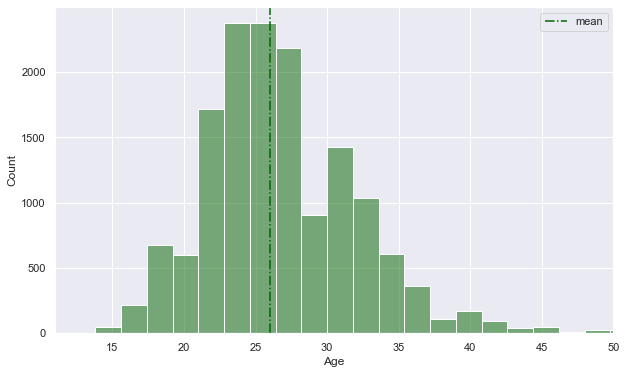

In [138]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set(style="darkgrid")

sns.histplot(data=olympics, x="Age", bins = 30, color = 'darkgreen', alpha=0.5)
plt.xlim(11,50)
ax.axvline(int(olympics.Age.mean()), color="darkgreen", ls="-.", label="mean")
ax.legend()

plt.show()

### Exercici 2: Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%. 

Els dos atributs que seleccionarem serà l'edat dels homes i l'edat de les dones. 

Primer, definim les hipòtesis:

- **Hipòtesis nul·la (Ho)**: la mitjana d'edat entre homes i dones és la mateixa.
- **Hipòtesis alternativa (Ha)**: la mitjana d'edat entre homes i dones NO és la mateixa. 

l'alfa està fixada al 5%

In [141]:
alpha = 0.05

women = olympics[olympics.Gender == 'Female']
men = olympics[olympics.Gender == 'Male']

Per a fer el contrast d'hipòtesis utilitzarem un **Two Sample T-test**.

In [142]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(women.Age, men.Age)
print('t-stat=%.3f, p-value=%.3f \n' % (stat, p))

if p > alpha:
    print('Probablement la mateixa mitjana en ambdós gèneres')
else:
    print('Probablement diferent mitjana d\'edat segons gènere')

t-stat=-11.442, p-value=0.000 

Probablement diferent mitjana d'edat segons gènere


Com que alpha (0,05) és major que el p-value (0,00), **rebutgem la hipòtessis nul·la.**
Això significa que hi ha evidència suficent que mostra que la mitjana d'edat dels atletes homes és diferent de la mitjana d'edat de les atletes dona. 

Comprovem que les mitjanes son, efectivament, diferents:

In [143]:
round(women.Age.describe(), 2)

count    7266.00
mean       26.22
std         5.50
min        12.00
25%        22.00
50%        26.00
75%        29.00
max        66.00
Name: Age, dtype: float64

In [144]:
round(men.Age.describe(), 2)

count    7855.00
mean       27.27
std         5.66
min        14.00
25%        23.00
50%        26.00
75%        30.00
max        62.00
Name: Age, dtype: float64

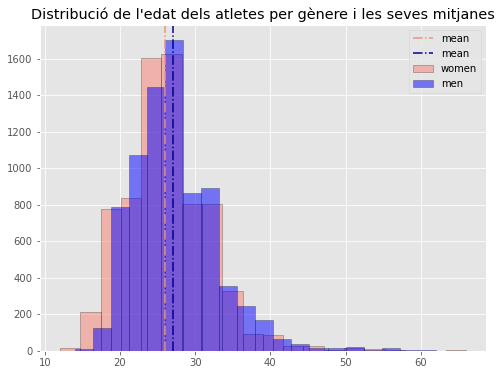

In [109]:
fig, ax = plt.subplots(figsize = (8,6))

plt.hist(women.Age, bins=20, color='salmon', edgecolor = 'k', alpha=0.5, label = 'women')
plt.hist(men.Age, bins=20, color='blue', edgecolor = 'k', alpha=0.5, label = 'men')

ax.axvline(int(women.Age.mean()), color="darksalmon", ls="-.", label="mean")
ax.axvline(int(men.Age.mean()), color="darkblue", ls="-.", label="mean")

plt.title ('Distribució de l\'edat dels atletes per gènere i les seves mitjanes')
ax.legend();

### Exercici 3: Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Els tres atributs del conjunt que hem seleccionat per al contrast d'hipòtesis son: 
- edat dels atletes provinents dels Estats Units
- edat dels atletes provinents de la Xina
- edat dels atletes provinents d'Espanya

Estudiarem si existeix una variació significativa entre aquestos 3 països en termes de l'edat dels seus participants als JJ.OO. 

Primer, definim les hipòtesis:

- **Hipòtesis nul·la (Ho)**: la mitjana d'edat entre els atletes dels 3 països és la mateixa.
- **Hipòtesis alternativa (Ha)**: la mitjana d'edat els atletes dels 3 països NO és la mateixa. 

l'alfa està fixada al 5%

In [ ]:
alpha = 0.05

In [157]:
USA = olympics[olympics.Country =='United States']
China = olympics[olympics.Country =='China']
Spain = olympics[olympics.Country =='Spain']

Per a fer el contrast d'hipòtesis utilitzarem el **one-way ANOVA**, que s'utilitza per determinar si hi ha una diferencia estadísticament significativa entre la mitjana aritmètica dels 3 grups o no. 

In [175]:
from scipy.stats import f_oneway

#perform one-way ANOVA
stat, p = f_oneway(USA.Age, China.Age, Spain.Age)
print('t-stat=%.3f, p-value=%.3f \n' % (stat, p))

if p > alpha:
    print('la mitjana d\'edat entre els atletes dels 3 països és la mateixa')
else:
    print('la mitjana d\'edat entre els atletes dels 3 països NO és la mateixa')

t-stat=26.134, p-value=0.000 

la mitjana d'edat entre els atletes dels 3 països NO és la mateixa


Com que alpha (0,05) és major que el p-value (0,00), **rebutgem la hipòtessis nul·la**.


comprovem que, efectivament les mitjanes d'edat entre els 3 països son diferents:

In [161]:
round(USA.Age.describe(), 2)

count    856.00
mean      26.87
std        6.07
min       15.00
25%       23.00
50%       26.00
75%       30.00
max       57.00
Name: Age, dtype: float64

In [162]:
round(China.Age.describe(), 2)

count    574.00
mean      25.10
std        4.52
min       14.00
25%       23.00
50%       25.00
75%       28.00
max       53.00
Name: Age, dtype: float64

In [163]:
round(Spain.Age.describe(), 2)

count    429.00
mean      27.48
std        5.99
min       16.00
25%       23.00
50%       27.00
75%       31.00
max       55.00
Name: Age, dtype: float64

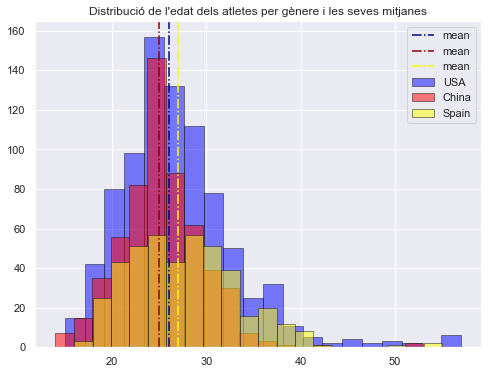

In [179]:
fig, ax = plt.subplots(figsize = (8,6))

plt.hist(USA.Age, bins=20, color='blue', edgecolor = 'k', alpha=0.5, label = 'USA')
plt.hist(China.Age, bins=20, color='red', edgecolor = 'k', alpha=0.5, label = 'China')
plt.hist(Spain.Age, bins=20, color='yellow', edgecolor = 'k', alpha=0.5, label = 'Spain')

ax.axvline(int(USA.Age.mean()), color="darkblue", ls="-.", label="mean")
ax.axvline(int(China.Age.mean()), color="darkred", ls="-.", label="mean")
ax.axvline(int(Spain.Age.mean()), color="yellow", ls="-.", label="mean")

plt.title ('Distribució de l\'edat dels atletes entre EE.UU., la Xina i Espanya')
ax.legend();